# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

%matplotlib inline

import re
import nltk

import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

# Reading Data

In [2]:
df=pd.read_csv("result_df.csv").drop("Unnamed: 0", axis=1)

In [3]:
df.head()

,reviewText,overall,sentiment,lemmatize,polarity,subjectivity,tokenized
0,i narrowed my choices down to this and an ipod...,5,positive,"['i', ' ', 'n', 'a', 'r', 'r', 'o', 'w', 'e', ...",0.079630,0.320370,"['i', 'narrowed', 'my', 'choices', 'down', 'to..."
1,these have been staple for years you cant get ...,5,positive,"['t', 'h', 'e', 's', 'e', ' ', 'h', 'a', 'v', ...",0.179636,0.289455,"['these', 'have', 'been', 'staple', 'for', 'ye..."
2,the ergonomic styling works well after only a ...,3,neutral,"['t', 'h', 'e', ' ', 'e', 'r', 'g', 'o', 'n', ...",0.099515,0.425154,"['the', 'ergonomic', 'styling', 'works', 'well..."
3,we have a panasonic vierra that is a great tv ...,5,positive,"['w', 'e', ' ', 'h', 'a', 'v', 'e', ' ', 'a', ...",0.135185,0.528704,"['we', 'have', 'a', 'panasonic', 'vierra', 'th..."
4,when i bought this i had high expectations but...,3,neutral,"['w', 'h', 'e', 'n', ' ', 'i', ' ', 'b', 'o', ...",0.209278,0.438778,"['when', 'i', 'bought', 'this', 'i', 'had', 'h..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562729 entries, 0 to 562728
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   reviewText    562729 non-null  object 
 1   overall       562729 non-null  int64  
 2   sentiment     562729 non-null  object 
 3   lemmatize     562729 non-null  object 
 4   polarity      562729 non-null  float64
 5   subjectivity  562729 non-null  float64
 6   tokenized     562729 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 30.1+ MB


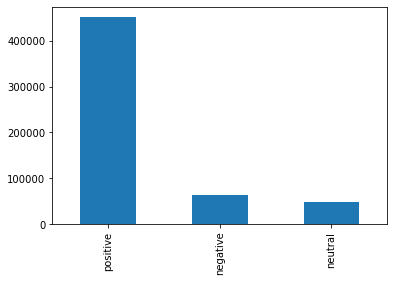

In [5]:
df["sentiment"].value_counts().plot(kind="bar");

# Word Cloud

In [6]:
from wordcloud import WordCloud

In [7]:
def wc(data,bgcolor):
    from PIL import Image
    mask = np.array(Image.open("a.png"))
    wc=WordCloud(background_color=bgcolor, width=800, height=400,mask=mask,max_words=200).generate(' '.join(data))
    plt.figure(figsize=(20,10))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [8]:
possitive_sentiment=df[df["sentiment"]=="positive"]["reviewText"]
negative_sentiment=df[df["sentiment"]=="negative"]["reviewText"]
neutral_sentiment=df[df["sentiment"]=="neutral"]["reviewText"]

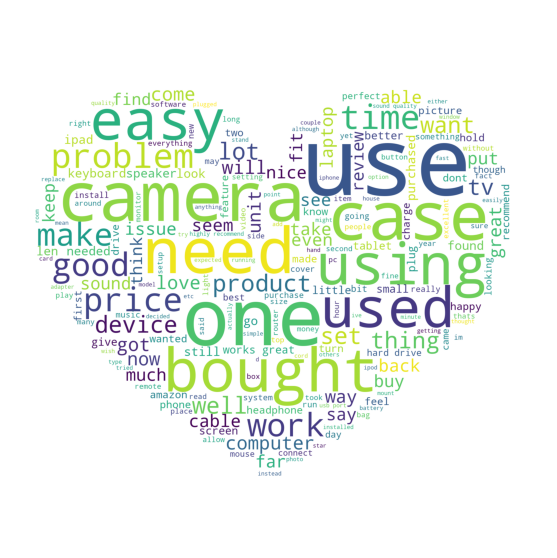

In [32]:
wc(possitive_sentiment,"white")

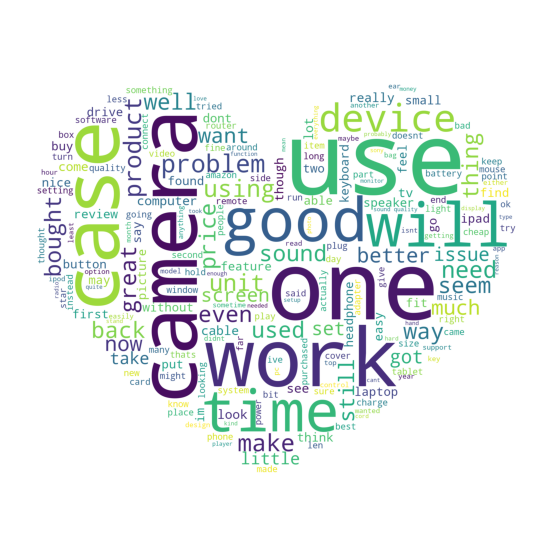

In [33]:
wc(neutral_sentiment,"white")

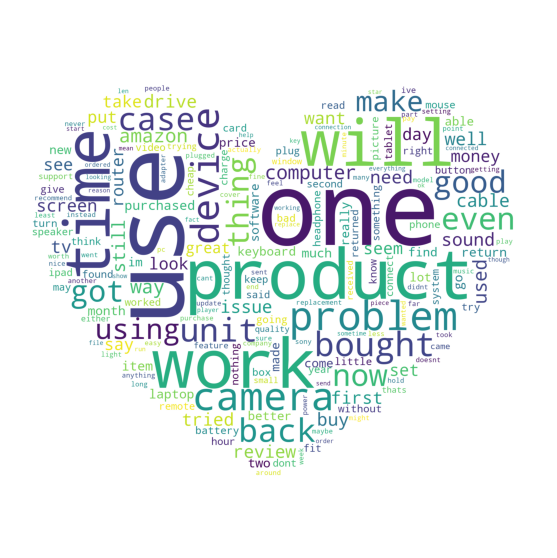

In [31]:
wc(negative_sentiment,"white")

# Classificaiton
Creating a classificaiton model that can predict whether a review is positive, negative or neutral.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [13]:
df.overall=df.overall.astype("category")

In [14]:
x,y=df['reviewText'],df['sentiment']

In [15]:
x.shape,y.shape

((562729,), (562729,))

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [17]:
vect=CountVectorizer()
x_train_dtm=vect.fit_transform(x_train,y_train)
x_test_dtm=vect.transform(x_test)

In [18]:
x_train_dtm.shape,x_test_dtm.shape

((422046, 488059), (140683, 488059))

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [20]:
b=MultinomialNB()
model=b.fit(x_train_dtm,y_train)
b_predict=b.predict(x_test_dtm)

In [21]:
accuracy_score(y_test,b_predict)

0.837151610358039

# Saving The Model
I will save the model so when I want to make a gui, I can get the model directly.

In [22]:
vocab = vect.vocabulary_

In [23]:
import pickle
pickle.dump(model, open('NLP.pkl', 'wb'))
pickle.dump(vocab, open('Vocab.pkl', 'wb'))